In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv("/content/uae_used_cars_10k.csv" )

print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()


Shape: (10000, 12)

Missing Values:
 Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64


,Year,Price,Mileage
count,10000.000000,1.000000e+04,10000.000000
mean,2014.472800,2.452345e+05,155161.871700
std,5.790839,4.709773e+05,83681.858983
min,2005.000000,7.183000e+03,10006.000000
25%,2009.000000,5.035250e+04,82904.000000
50%,2014.000000,1.027660e+05,154370.500000
75%,2019.000000,2.312480e+05,227551.250000
max,2024.000000,1.468698e+07,299996.000000


In [8]:
df.dropna(inplace=True)

c = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in c :
    df[col] = le.fit_transform(df[col])

In [9]:
if 'price' in df.columns:
    X = df.drop('price', axis=1)
    y = df['price']
elif 'Price' in df.columns:
    X = df.drop('Price', axis=1)
    y = df['Price']
else:
    raise KeyError("Target column 'price' or 'Price' not found in the DataFrame.")

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 399469.14461924124
R² Score: 0.02401104960824796


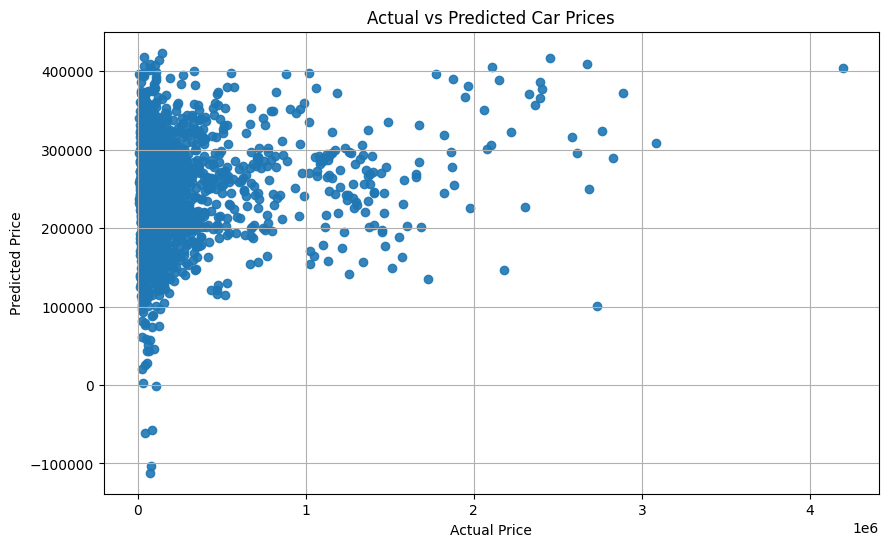

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.9)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()